In [1]:
%config IPCompleter.greedy = True

In [2]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np

physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

train_images = train_images / 255.
test_images = test_images / 255.

In [4]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64, (3, 3), activation=keras.activations.relu, input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(64, (3, 3), activation=keras.activations.relu))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation=keras.activations.relu))
model.add(keras.layers.Dense(10, activation=keras.activations.softmax))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [6]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])

In [7]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 4ms/step - loss: 0.6198 - accuracy: 0.7785
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3077 - accuracy: 0.8870
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2493 - accuracy: 0.9075
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2158 - accuracy: 0.9194
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1866 - accuracy: 0.9305
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1630 - accuracy: 0.9392
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1447 - accuracy: 0.9450
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1258 - accuracy: 0.9499
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1122 - accuracy: 0.9580
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.09

In [8]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3047 - accuracy: 0.9098


[0.30466291308403015, 0.9097999930381775]

In [9]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)

In [10]:
pred = activation_model.predict(test_images[0].reshape((1, 28, 28, 1)))

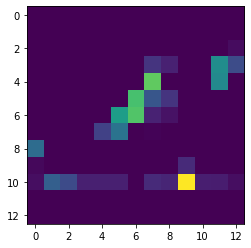

In [11]:
plt.imshow(pred[1][0, :, :, 1])

In [12]:
layer_outputs

[<KerasTensor: shape=(None, 26, 26, 64) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 13, 13, 64) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 11, 11, 64) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 5, 5, 64) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 1600) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_1')>]

In [13]:
class_names = np.array(["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"])

In [15]:
class_names[np.argmax(model.predict(test_images[0:10]), -1)]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser',
       'Coat', 'Shirt', 'Sandal', 'Sneaker'], dtype='<U11')